# Logistics Regression

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_1 = pd.read_csv('ex2data1.txt',delimiter=',', names=['Exam1 score','Exam2 score','admission'])

In [5]:
data_1.head()

,Exam1 score,Exam2 score,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [164]:
#训练集中的x1,x2
def get_x(df):
    score = df.iloc[:,:-1].as_matrix()
    #print(score.shape)
    m = df.iloc[:,1].size
    one = np.ones([m,1])
    score =np.hstack((one,score))
    return score

In [105]:
#整理数据之该整理y
def get_y(df):
    ad = df.iloc[:,-1].as_matrix()
    return ad

In [110]:
x = get_x(data_1)
y = get_y(data_1)
x.shape

(100, 2)


(100, 3)

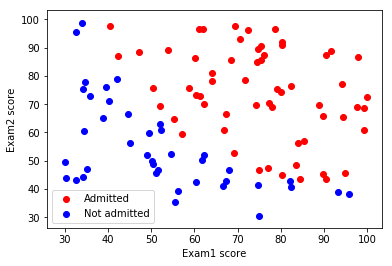

In [35]:
posi_1 = data_1[data_1.iloc[:,-1]==1].iloc[:,:-1]
nega_1 = data_1[data_1.iloc[:,-1] ==0].iloc[:,:-1]
plt.scatter(posi_1.iloc[:,0],posi_1.iloc[:,1],c= 'r',label = 'Admitted')
plt.scatter(nega_1.iloc[:,0],nega_1.iloc[:,1],c= 'b',label = 'Not admitted')
plt.legend()
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.show()

In [37]:
#归一化
def nomalize_data(df):
    return df.apply(lambda x:(x.max-x.mean)/x.std())

## sigmoid
* 绘制sigmoid函数

In [38]:
def sigmoid_function(z):
    return 1/(1+np.exp(-z))

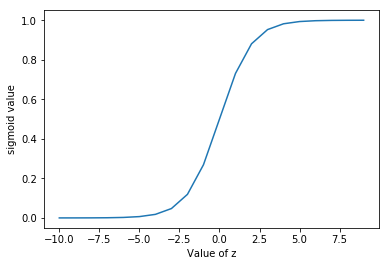

In [41]:
nums = np.arange(-10,10)
import seaborn as sns
plt.plot(nums, sigmoid_function(nums))
plt.xlabel('Value of z')
plt.ylabel('sigmoid value')
plt.show()

## Cost Function and Gradient

In [126]:
def cost_function(theta,x,y):
    m = x[:,-1].shape[0]
    z = x@theta
    #print(z.shape,z[:5])
    return  -np.mean(y*np.log(sigmoid_function(z))+(1-y)*np.log(1-sigmoid_function(z)))

In [127]:
theta = np.zeros(3)
theta

array([ 0.,  0.,  0.])

In [128]:
cost_function(theta,x,y)
#检验当theta均为0时的cost_function值

0.69314718055994529

In [129]:
def gradient(theta,x,y):
    m = x[:,-1].shape[0]
    return  1/m*(x.T@(sigmoid_function(x@theta)-y))

In [130]:
theta_1 =np.zeros(3)
gradient(theta_1,x,y)

array([ -0.1       , -12.00921659, -11.26284221])

## 第一个结果 
* 利用 minimize模块

In [131]:
import scipy.optimize as opt

res = opt.minimize(fun=cost_function, x0=theta, args=(x, y), method='Newton-CG', jac=gradient)
print(res)

     fun: 0.20349771091213836
     jac: array([  2.03252863e-05,   9.40111929e-04,   1.29146014e-03])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 28
    njev: 241
  status: 0
 success: True
       x: array([-25.15341682,   0.20616839,   0.20140754])


## 验证准确率

In [135]:
from sklearn.metrics import classification_report #评价报告的包

In [136]:
final_theta_1 = res.x

In [137]:
def predict(x,theta):
    prob = sigmoid_function(x@theta)
    return (prob>=0.5).astype(int)

In [139]:
y_predict = predict(x,final_theta_1)
print(classification_report(y,y_predict))

             precision    recall  f1-score   support

          0       0.87      0.85      0.86        40
          1       0.90      0.92      0.91        60

avg / total       0.89      0.89      0.89       100



## 第二个结果 利用 fmin_tnc

In [132]:
result = opt.fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(x, y))
result

(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)

In [140]:
final_theta_2 = np.matrix(result[0])
final_theta_2

matrix([[-25.16131865,   0.20623159,   0.20147149]])

In [134]:
cost_function(theta_1,x,y)

0.69314718055994529

In [142]:
x_1 = np.arange(130,step = 0.1)

In [149]:
coef = res.x/res.x[2]
print(coef)

y_1 = -coef[0]-coef[1]*x_1


[-124.88815687    1.02363786    1.        ]


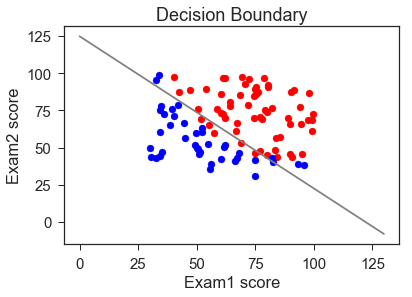

In [152]:
sns.set(context="notebook", style="ticks", font_scale=1.5)
posi_1 = data_1[data_1.iloc[:,-1]==1].iloc[:,:-1]
nega_1 = data_1[data_1.iloc[:,-1] ==0].iloc[:,:-1]
plt.scatter(posi_1.iloc[:,0],posi_1.iloc[:,1],c= 'r',label = 'Admitted')
plt.scatter(nega_1.iloc[:,0],nega_1.iloc[:,1],c= 'b',label = 'Not admitted')
plt.plot(x_1,y_1,'grey')
plt.title('Decision Boundary')
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.show()

# 正则化

In [154]:
data_2 = pd.read_csv('ex2data2.txt',names = ['test1','test2','accepted'])
data_2.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [155]:
data_2.describe()

,test1,test2,accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


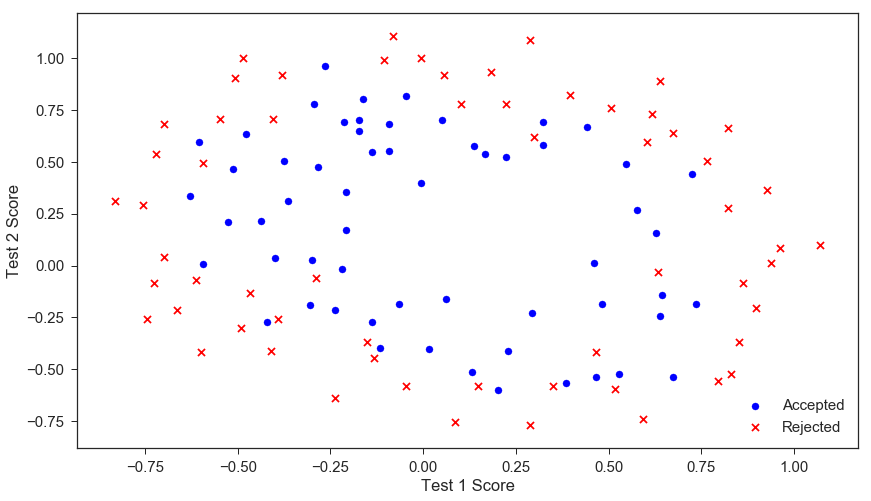

In [162]:
fig =plt.subplots(figsize = (14,8))
posi_2 = data_2[data_2.iloc[:,-1]==1]
nega_2 = data_2[data_2.iloc[:,-1]==0]
plt.scatter(posi_2.iloc[:,0],posi_2.iloc[:,1],s = 50,c  ='b',marker = 'o',label = 'Accepted')
plt.scatter(nega_2.iloc[:,0], nega_2.iloc[:,1],s = 50,c = 'r',marker = 'x',label = 'Rejected')
plt.legend(loc=4,)
plt.xlabel('Test 1 Score')
plt.ylabel('Test 2 Score')
plt.show()

# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [175]:
x_2 = get_x(data_2)
y_2 = get_y(data_2)
print(x_2.shape,y_2.shape)


(118, 3) (118,)


In [169]:
def feature_mappint(x1,x2,power,nd_array =False):
    data = {'f{}{}'.format(i,p): np.power(x1,i)*np.power(x2,p)
           for i in range(power+1)
           for p in range(power-i+1)}
    if nd_array:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)

In [194]:
data = feature_mappint(x_2[:,1],x_2[:,2],power = 6,nd_array=True)
print(data.shape)


(118, 28)


In [195]:
y_2.shape[0]

118

In [196]:
def regularized_cost(theta,x,y):
    theta_1 = theta[1:]
    m = y.shape[0]
    regularized_tem = 1/(2*m)*(np.power(theta_1,2).sum())
    return cost_function(theta,x,y)+regularized_tem

In [206]:
def regularized_gradient(theta,x,y,l =1):
    theta_1 = theta[1:]
    m = y.shape[0]
    
    regularized_theta = (1/m)*theta_1
    regularized_term  =np.concatenate([np.array([0]),regularized_theta])
   # print(regularized_term.shape)
    return gradient(theta,x,y) + regularized_term


In [207]:
theta_2 = np.zeros(data.shape[1])
regularized_gradient(theta_2,data,y_2)

array([  8.47457627e-03,   7.77711864e-05,   3.76648474e-02,
         2.34764889e-02,   3.93028171e-02,   3.10079849e-02,
         3.87936363e-02,   1.87880932e-02,   1.15013308e-02,
         8.19244468e-03,   3.09593720e-03,   4.47629067e-03,
         1.37646175e-03,   5.03446395e-02,   7.32393391e-03,
         1.28600503e-02,   5.83822078e-03,   7.26504316e-03,
         1.83559872e-02,   2.23923907e-03,   3.38643902e-03,
         4.08503006e-04,   3.93486234e-02,   4.32983232e-03,
         6.31570797e-03,   1.99707467e-02,   1.09740238e-03,
         3.10312442e-02])

## 拟合参数

In [208]:
import scipy.optimize as opt

In [209]:
regularized_cost(theta_2,data,y_2)

0.6931471805599454

In [210]:
res_2 = opt.minimize(fun = regularized_cost,x0 = theta_2, args = (data,y_2),method = 'Newton-CG', jac = regularized_gradient)

In [211]:
res_2

     fun: 0.5290027297126634
     jac: array([  2.03955271e-07,   1.07887234e-07,   4.17452497e-08,
         3.72793652e-08,  -5.79620449e-09,   1.66759844e-08,
         9.61245352e-09,  -1.77664287e-08,  -3.61578102e-09,
        -1.54630018e-08,  -3.27623600e-09,  -3.45118439e-09,
        -4.05476892e-09,  -4.14105012e-08,   4.00885103e-09,
        -2.03687041e-08,  -1.13990358e-09,  -9.20056092e-09,
        -2.14158287e-09,  -4.74272220e-09,  -8.31876535e-09,
        -3.46210984e-09,  -2.92655518e-08,  -1.55948373e-09,
        -8.88473950e-09,  -8.80406862e-09,  -3.94570827e-10,
        -3.07391561e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 72
  status: 0
 success: True
       x: array([ 1.2727393 ,  1.18108847, -1.43166436, -0.1751304 , -1.19281674,
       -0.45635712, -0.92465192,  0.62527148, -0.9174238 , -0.35723987,
       -0.27470662, -0.29537813, -0.14388723, -2.01996096, -0.36553428,
       -0.61555547, -0.27778449, -

In [212]:
fina_theta = res_2.x
y_predict_2 = predict(data,fina_theta)
print(classification_report(y_2, y_predict_2))

             precision    recall  f1-score   support

          0       0.90      0.75      0.82        60
          1       0.78      0.91      0.84        58

avg / total       0.84      0.83      0.83       118



In [232]:
def find_decision_boundary(density,power, theta,threshold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mappint(x_cord, y_cord, power)  # this is a dataframe

    inner_product = mapped_cord.as_matrix() @ theta

    decision = mapped_cord[np.abs(inner_product) < threshold]

    return decision.f10, decision.f01

In [233]:
def draw_boundary(theta,power,l):
    density = 1000
    threshhold = 2 *10**-3
    x,y = find_decision_boundary(density,power,theta,threshhold)
    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot('test1', 'test2', hue='accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

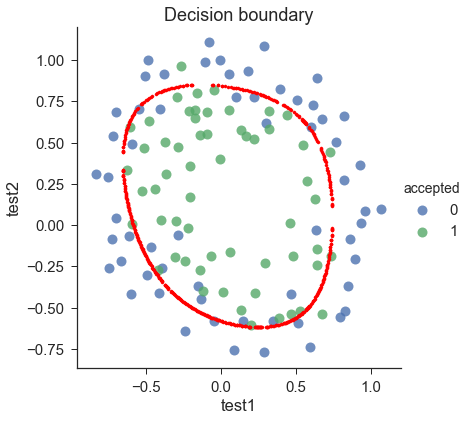

In [234]:
draw_boundary(fina_theta,power=6,l=1)#lambda=1

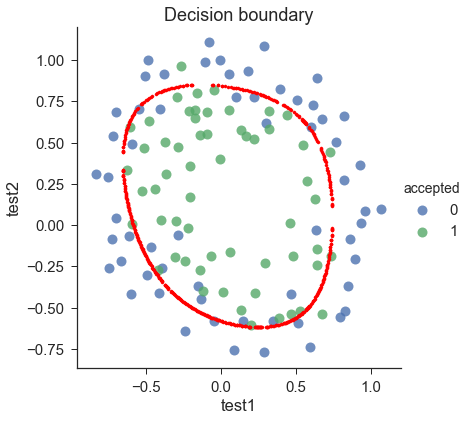

In [235]:
draw_boundary(fina_theta,power=6, l=0) 